# Amazon-Flex Data Science Techniques (Part I) - Juan Moctezuma

The following script plots a time series analysis and one time series forecast. The data comes from the FUEL_EXPENSES.csv which contains 2021 data from the RDF (Raw Data File) CSV file and historical data (fuel expenses from 2020 that ocurred before this project began). 

...

## 1. Time Series Analysis

The first step is to install the required libraries.

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install sklearn

In [ ]:
#!pip install datetime

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install scipy

In [ ]:
#!pip install statsmodels

In [ ]:
#!pip install pystan

In [ ]:
#!pip install fbprophet

First step is to import the libraries that you installed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from datetime import datetime
from fbprophet import Prophet
from matplotlib.ticker import FormatStrFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

Importing plotly failed. Interactive plots will not work.


Once the fuel expenses csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [2]:
data = pd.read_csv("Data/FUEL_EXPENSES.csv")
df = pd.DataFrame(data, columns= ['DATE','FUEL_COST'])

In [3]:
# Each date time represents one block
print(df)

        DATE  FUEL_COST
0    11/2/20      10.00
1    11/3/20      10.00
2    11/4/20      10.00
3    11/5/20      10.00
4    11/6/20      10.00
5    11/9/20      10.16
6   11/10/20      10.10
7   11/14/20      10.00
8   11/17/20      10.00
9   11/19/20      14.02
10  11/23/20       7.30
11   12/4/20      12.00
12  12/18/20      20.07
13  12/28/20      10.01
14    1/2/21      11.04
15    1/8/21      11.02
16    1/9/21      17.20
17   1/15/21      20.22
18   1/22/21      11.10
19   1/29/21      11.50
20    2/5/21      11.30
21   2/12/21      11.37
22   2/13/21      11.30
23   2/19/21      11.40
24   2/26/21      11.23


The 'describe' function allows you to obtain the basic numerical information about your file.

In [4]:
df.describe()

,FUEL_COST
count,25.000000
mean,11.693600
std,3.080748
min,7.300000
25%,10.000000
50%,11.040000
75%,11.400000
max,20.220000


The following script generates the fuel cost analysis (connected scatter plot). Data gets updated occasionally.

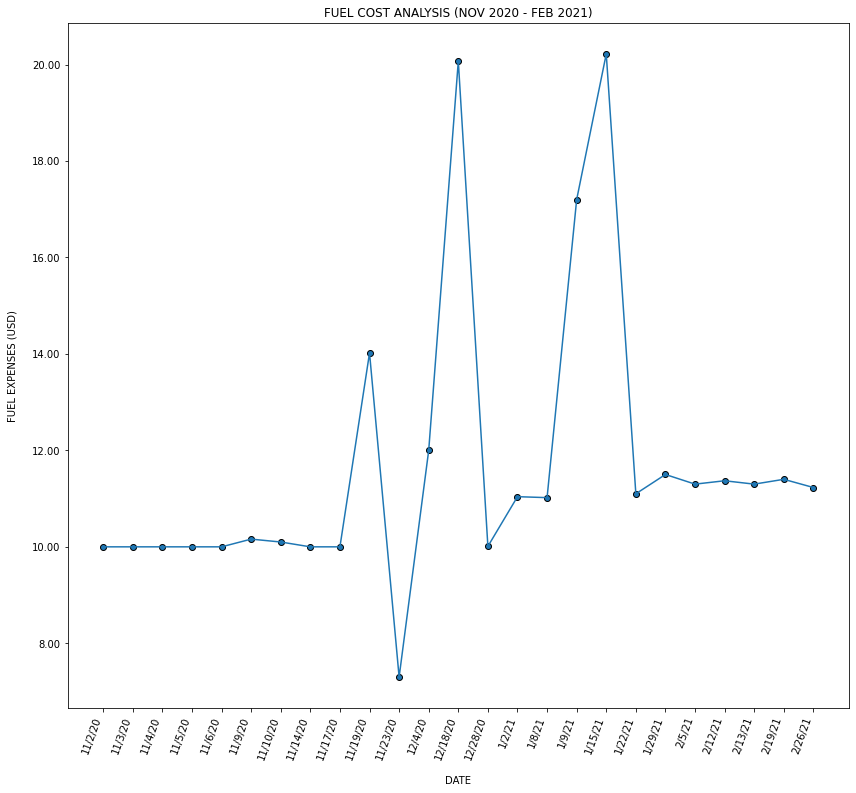

In [5]:
fig, ax = plt.subplots()
block_date = data['DATE']
fuel_cost = data['FUEL_COST']

# Using both plot and scatter functions create a connected scatter plot
plt.scatter(block_date, fuel_cost, edgecolor = 'black', linewidth = 1, marker = 'o')
plt.plot(block_date, fuel_cost)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.gcf().autofmt_xdate(rotation = 70)
plt.title('FUEL COST ANALYSIS (NOV 2020 - FEB 2021)')
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("FUEL EXPENSES (USD)", labelpad = 15)
plt.gcf().set_size_inches((14, 14))
plt.show()

The following script prints the rolling mean and rolling standard deviation. Rolling statistics exclude expenses from 2020 and outliers should disappear. Data increases as author compiles it and gets updated. All 'NaN' values replace historical data points (2020 data).

In [6]:
rolmean = data.rolling(window=14).mean()
rolstd = data.rolling(window=14).std()
print(rolmean, rolstd)


    FUEL_COST
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13  10.975714
14  11.050000
15  11.122857
16  11.637143
17  12.367143
18  12.445714
19  12.541429
20  12.627143
21  12.725000
22  12.817857
23  12.630714
24  12.911429     FUEL_COST
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13   2.981517
14   2.968263
15   2.952987
16   3.343532
17   4.008206
18   3.968822
19   3.925379
20   3.880816
21   3.826366
22   3.770516
23   3.771279
24   3.478897


The following script plots the fuel expense analysis and the rolling statistics' data. Rolling statistics exclude expenses from 2020. Data increases as author compiles it and gets updated. The following plot represents the time series analysis.

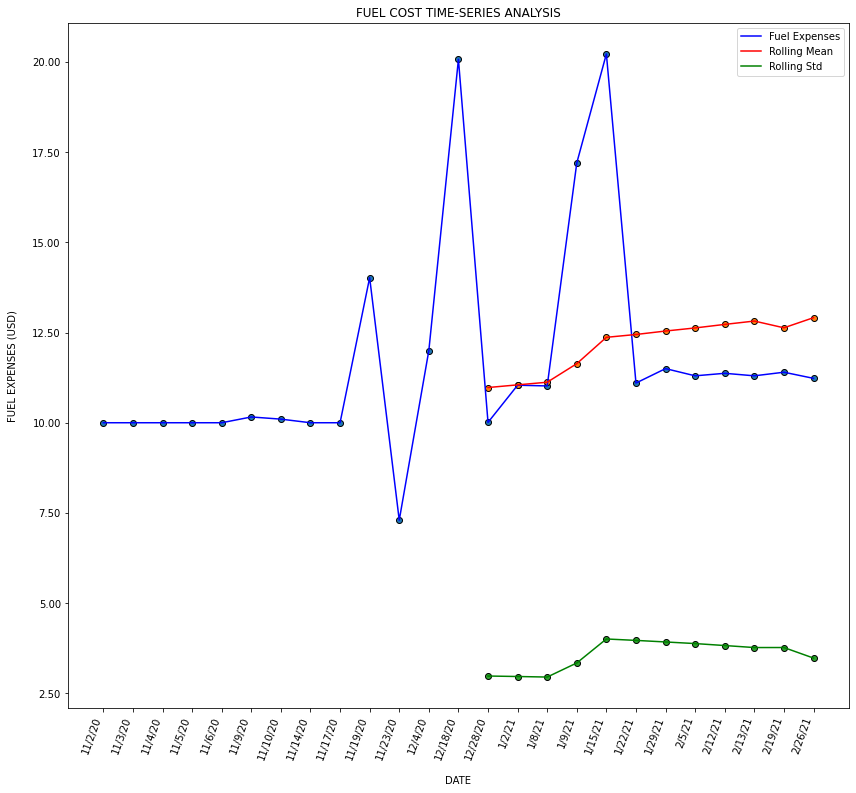

In [7]:
fig, ax = plt.subplots()

# Using plot and scatter functions create a connected scatter plot
orig = plt.plot(block_date, fuel_cost, color='blue', label='Fuel Expenses')
orig_scatter = plt.scatter(block_date, fuel_cost, edgecolor = 'black', linewidth = 1, marker = 'o')
mean = plt.plot(block_date, rolmean, color='red', label='Rolling Mean')
mean_scatter = plt.scatter(block_date, rolmean, edgecolor = 'black', linewidth = 1, marker = 'o')
std = plt.plot(block_date, rolstd, color='green', label='Rolling Std')
std_scatter = plt.scatter(block_date, rolstd, edgecolor = 'black', linewidth = 1, marker = 'o')

plt.legend(loc='best')
plt.title('FUEL COST TIME-SERIES ANALYSIS')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.gcf().autofmt_xdate(rotation = 70)
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("FUEL EXPENSES (USD)", labelpad = 15)
plt.gcf().set_size_inches((14, 14))
plt.show()
#plt.show(block=False)

Dickey-Fuller test gets applied

In [8]:
print('Results of Dickey-Fuller Test:')
df_test = adfuller(fuel_cost, autolag = 'AIC')
df_output = pd.Series(df_test[0:4], index = ['Test Statistic','P-Value','Number of Lags Used', 'Number of Observations Used'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value

print(df_output)

Results of Dickey-Fuller Test:
Test Statistic                 -4.034344
P-Value                         0.001241
Number of Lags Used             0.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


Log plot gets created after the Dickey-Fuller test. The log function scales the data to verify if the data is stationary (constant). The graph's shape should resemble the original fuel expense analysis. 

In [9]:
data['DATE'] = pd.to_datetime(data['DATE'], infer_datetime_format = True)
indexedData = data.set_index(['DATE'])
cln_indexdata = indexedData.drop(['RAW_DATA (Y/N)','BRAND'], axis = 1)

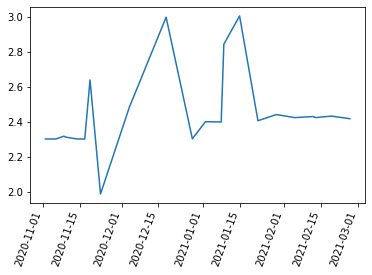

In [10]:
# Graph will look the same but scale (Y-axis values) changes
fig, ax = plt.subplots()

data_logScale = np.log(cln_indexdata)
plt.gcf().autofmt_xdate(rotation = 70)
plt.plot(data_logScale)

## 2. Time Series Forecast

The data gets processed differently. For the sake of simplicity, a second dataframe (df_v2) gets created.

In [11]:
data_v2 = pd.read_csv("Data/FUEL_EXPENSES.csv")
data['DATE'] = pd.to_datetime(data['DATE'], infer_datetime_format = True)
df_v2 = pd.DataFrame(data, columns= ['FUEL_COST','DATE'])
df_v2.rename({'FUEL_COST':'y','DATE':'ds'}, axis = 1, inplace = True)
df_v2.dtypes

y            float64
ds    datetime64[ns]
dtype: object

We need to change the column's order and the format of the date, so we can appropriately set our 'y' and 'ds' for the Prophet function. df_v2 gets printed to verify that our data is placed correctly.

In [12]:
print(df_v2)

        y         ds
0   10.00 2020-11-02
1   10.00 2020-11-03
2   10.00 2020-11-04
3   10.00 2020-11-05
4   10.00 2020-11-06
5   10.16 2020-11-09
6   10.10 2020-11-10
7   10.00 2020-11-14
8   10.00 2020-11-17
9   14.02 2020-11-19
10   7.30 2020-11-23
11  12.00 2020-12-04
12  20.07 2020-12-18
13  10.01 2020-12-28
14  11.04 2021-01-02
15  11.02 2021-01-08
16  17.20 2021-01-09
17  20.22 2021-01-15
18  11.10 2021-01-22
19  11.50 2021-01-29
20  11.30 2021-02-05
21  11.37 2021-02-12
22  11.30 2021-02-13
23  11.40 2021-02-19
24  11.23 2021-02-26


The following trains the machine learning model.

In [13]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df_v2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


Forecast Away

In [14]:
# 200 data predicting points where added in addition to the FUEL_EXPENSES data
future = m.make_future_dataframe(periods = 200, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-02,0.644992,3.841134,14.726642,0.644992,0.644992,8.776441,8.776441,8.776441,10.320806,10.320806,10.320806,-1.544365,-1.544365,-1.544365,0.0,0.0,0.0,9.421433
1,2020-11-03,0.642425,4.843830,15.144553,0.642425,0.642425,9.408898,9.408898,9.408898,10.320806,10.320806,10.320806,-0.911908,-0.911908,-0.911908,0.0,0.0,0.0,10.051323
2,2020-11-04,0.639857,4.666093,15.430877,0.639857,0.639857,9.360152,9.360152,9.360152,10.320806,10.320806,10.320806,-0.960655,-0.960655,-0.960655,0.0,0.0,0.0,10.000009
3,2020-11-05,0.637289,7.009131,17.123459,0.637289,0.637289,11.390640,11.390640,11.390640,10.320806,10.320806,10.320806,1.069834,1.069834,1.069834,0.0,0.0,0.0,12.027930
4,2020-11-06,0.634722,7.512396,17.721238,0.634722,0.634722,12.382245,12.382245,12.382245,10.320806,10.320806,10.320806,2.061439,2.061439,2.061439,0.0,0.0,0.0,13.016967


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
220,2021-09-10,-0.156561,7.244338,17.274514,-0.156749,-0.156383,12.382245,12.382245,12.382245,10.320806,10.320806,10.320806,2.061439,2.061439,2.061439,0.0,0.0,0.0,12.225685
221,2021-09-11,-0.159130,6.520667,17.534441,-0.159319,-0.158949,11.896562,11.896562,11.896562,10.320806,10.320806,10.320806,1.575756,1.575756,1.575756,0.0,0.0,0.0,11.737432
222,2021-09-12,-0.161700,3.178832,14.031860,-0.161890,-0.161516,9.030706,9.030706,9.030706,10.320806,10.320806,10.320806,-1.290101,-1.290101,-1.290101,0.0,0.0,0.0,8.869006
223,2021-09-13,-0.164269,3.518697,13.768525,-0.164460,-0.164084,8.776441,8.776441,8.776441,10.320806,10.320806,10.320806,-1.544365,-1.544365,-1.544365,0.0,0.0,0.0,8.612172
224,2021-09-14,-0.166839,4.000114,14.841853,-0.167031,-0.166652,9.408898,9.408898,9.408898,10.320806,10.320806,10.320806,-0.911908,-0.911908,-0.911908,0.0,0.0,0.0,9.242060


In [16]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-11-02,9.421433
1,2020-11-03,10.051323
2,2020-11-04,10.000009
3,2020-11-05,12.027930
4,2020-11-06,13.016967
...,...,...
220,2021-09-10,12.225685
221,2021-09-11,11.737432
222,2021-09-12,8.869006
223,2021-09-13,8.612172


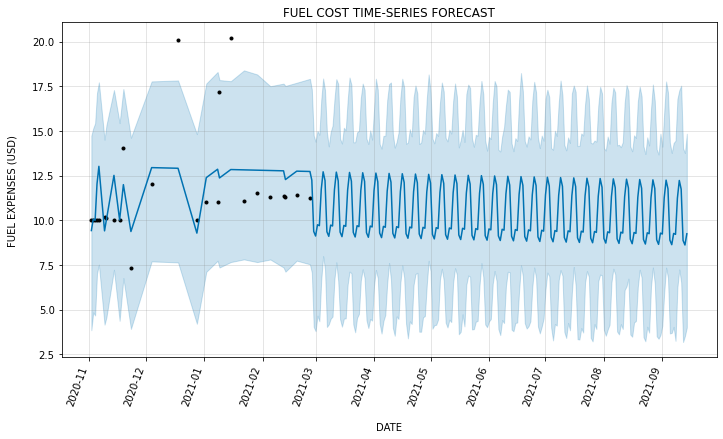

In [17]:
plot_forecast = m.plot(forecast)

plt.title('FUEL COST TIME-SERIES FORECAST')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.gcf().autofmt_xdate(rotation = 70)
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("FUEL EXPENSES (USD)", labelpad = 15)

## 4. Conclusion

In [ ]:
# The time series analysis for fuel costs reflects a minor increasing trend in gas expenses. 
# There are a few outliers in the data, and it is possible that some might happen again in the future. 
# An increasing trend is expected as gas prices tend to increment in San Diego County, CA.

In [ ]:
# The time series forecast for fuel expenses is a machine learning model that requires a large amount of data points. 
# Outliers in historical data causes the model to predict values that reflect an oscillatory behavior, but the graph’s
# appearance will get modified as data changes and the dataset gets larger. It is possible that another slide 
# reflecting a recent forecast will get included in this presentation for comparative purposes.